In [1]:
#!/usr/bin/env python
# coding: utf-8

from util import *
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# our dataset has different cases in 10 random seeds, 9 energy coef., 10 orientations, 9 frames, 30 rows, and 40 columns. 
dname = 'immatrix_2D_40x30_f9_e2'
immatrix = np.load(dname+'.npy')
print('(seed, energy coef., orientations, frames, rows, cols):', immatrix.shape)
frame = immatrix.shape[3]
ori_x = [1,0] # base to compute orientation angles
candidates = [[1,0],[1,1],[1,2],[1,3],[0,1],[1,5],[2,1],[3,1],[4,1],[1,4]] # all the cases in different orientations
ori_sorted = [sin_angle([1,0], i) for i in sorted(candidates, key = lambda s: sin_angle(ori_x,s))] # sorted cases by rad values 


(seed, energy coef., orientations, frames, rows, cols): (10, 9, 10, 9, 30, 40)


In [2]:
stamp = 'DyFraNet_paper'

from tensorflow.keras.models import load_model
model = load_model('model/'+stamp+'/model')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 20, 256)       13056     
                                                                 
 activation (Activation)     (None, 15, 20, 256)       0         
                                                                 
 dropout (Dropout)           (None, 15, 20, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 10, 256)        590080    
                                                                 
 activation_1 (Activation)   (None, 8, 10, 256)        0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 10, 256)        0         
                                                                 
 reshape (Reshape)           (None, 80, 256)           0

### Case 1

In [3]:
fname='test1_deg45'
os.makedirs('prediction/'+fname, exist_ok=True)
os.system('rm prediction/'+fname+'/*.png')

0

0

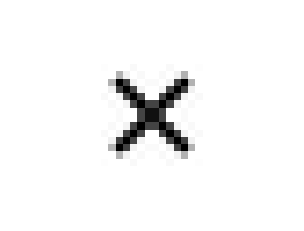

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
# setting up the input geometry
X=np.ones((1, 30, 40, 2))
X[...,0]=X[...,0]*10
X[...,1]=X[...,1]*ori_sorted[1]

X[:,8:22,19:21,0]=1
X[:,14:16,13:27,0]=1

from scipy.ndimage.interpolation import rotate
X_center = rotate(X[:,5:25,10:30,0], axes=(1,2), angle=45, reshape = False)
X[:,5:25,10:30,0]=X_center
X[X==0]=10

plt.imshow(X[0,...,0], cmap='gray', vmin=0, vmax=10)
plt.axis('off')
plt.savefig('prediction/'+fname+'.png', bbox_inches='tight', pad_inches=0, dpi = 10)

# prediction and post-processing the movie
y_pred = model.predict(X)
for f in range(frame):#imnbr//len(ori)+1):
    yhat=1-y_pred[0,f,...,0]
    plt.figure()

    YIMG = Image.fromarray(yhat)
    YIMG = np.array(YIMG)
    plt.imshow(YIMG, cmap = 'gray', vmin=0, vmax=1)
    plt.imshow(X[0,...,0], cmap='hot', vmin=0, vmax=10, alpha=0.2)
    plt.axis('off')
    plt.savefig('prediction/'+fname+'/'+str(f).zfill(2)+'.png', bbox_inches = 'tight',
    pad_inches = 0)

    plt.clf()
os.system('python3 img2gif.py '+'prediction/'+fname)


### Case 2

In [5]:
fname='test2_deg45'
os.makedirs('prediction/'+fname, exist_ok=True)
os.system('rm prediction/'+fname+'/*.png')

0

0

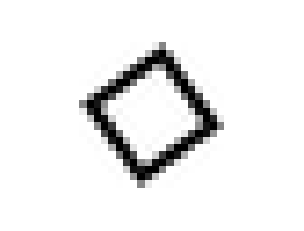

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
# setting up the input geometry
X=np.ones((1, 30, 40, 2))
X[...,0]=X[...,0]*10
X[...,1]=X[...,1]*ori_sorted[1]

t=2
X[:,8:22,13:27,0]=1
X[:,8+t:22-t,13+t:27-t,0]=10

from scipy.ndimage.interpolation import rotate
X_center = rotate(X[:,5:25,10:30,0], axes=(1,2), angle=36, reshape = False)
X[:,5:25,10:30,0]=X_center
X[X==0]=10

plt.imshow(X[0,...,0], cmap='gray', vmin=0, vmax=10)
plt.axis('off')
plt.savefig('prediction/'+fname+'.png', bbox_inches='tight', pad_inches=0, dpi = 10)

# prediction and post-processing the movie
y_pred = model.predict(X)
for f in range(frame):#imnbr//len(ori)+1):
    yhat=1-y_pred[0,f,...,0]
    plt.figure()

    YIMG = Image.fromarray(yhat)
    YIMG = np.array(YIMG)
    plt.imshow(YIMG, cmap = 'gray', vmin=0, vmax=1)
    plt.imshow(X[0,...,0], cmap='hot', vmin=0, vmax=10, alpha=0.2)
    plt.axis('off')
    plt.savefig('prediction/'+fname+'/'+str(f).zfill(2)+'.png', bbox_inches = 'tight',
    pad_inches = 0)

    plt.clf()
os.system('python3 img2gif.py '+'prediction/'+fname)